In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np

In [2]:
data = pd.read_csv('../Data/drop_calorie.csv')
data

,age,weight(kg),height(m),gender,BMI,BMR,activity_level
0,2,16.097862,0.932025,1,18.531612,958.584,1.2
1,4,14.619374,0.916687,1,17.397496,932.383,1.7
2,4,17.899918,0.997288,1,17.997414,977.578,1.9
3,3,13.532880,1.022786,1,12.936609,944.689,1.9
4,4,17.039484,1.053977,0,15.338909,799.229,1.9
...,...,...,...,...,...,...,...
10721,72,95.444236,1.631113,1,35.874169,1510.154,1.3
10722,85,97.976899,1.631409,1,36.812724,1473.418,1.7
10723,50,97.761259,1.631864,1,36.711217,1635.925,1.7
10724,57,96.829324,1.631290,1,36.386871,1593.981,1.3


In [3]:
x=data.drop('BMR',axis=1)
y=data['BMR']

In [4]:
normalizer = tf.keras.layers.experimental.preprocessing.Normalization(input_shape=(x.shape[1],),axis=-1)
normalizer.adapt(np.array(x))
print(normalizer.mean.numpy())

[26.778576   61.647728    1.5402758   0.51948535 24.788317    1.4874511 ]


In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape,y_train.shape

((8580, 6), (8580,))

In [53]:
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1),
])
model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),)
history=model.fit(x_train, y_train, epochs=200, batch_size=4,
                  validation_split=0.2)

Epoch 1/200
1716/1716 [==============================] - 2s 1ms/step - loss: 791.0930 - val_loss: 123.5220
Epoch 2/200
1716/1716 [==============================] - 1s 872us/step - loss: 65.1958 - val_loss: 41.6220
Epoch 3/200
1716/1716 [==============================] - 1s 799us/step - loss: 36.0938 - val_loss: 30.7777
Epoch 4/200
1716/1716 [==============================] - 2s 931us/step - loss: 28.4145 - val_loss: 25.3158
Epoch 5/200
1716/1716 [==============================] - 1s 681us/step - loss: 24.0090 - val_loss: 21.5880
Epoch 6/200
1716/1716 [==============================] - 1s 644us/step - loss: 20.8741 - val_loss: 18.9992
Epoch 7/200
1716/1716 [==============================] - 1s 621us/step - loss: 18.3342 - val_loss: 17.7535
Epoch 8/200
1716/1716 [==============================] - 1s 624us/step - loss: 16.0067 - val_loss: 14.5922
Epoch 9/200
1716/1716 [==============================] - 1s 616us/step - loss: 13.8722 - val_loss: 12.5275
Epoch 10/200
1716/1716 [=============

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def plot_loss(history,start,end):
  x_index=[x for x in range (start,end)]
  plt.plot(x_index,history.history['loss'][start-1:end-1], label='loss')
  plt.plot(x_index,history.history['val_loss'][start-1:end-1], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss MAE')
  plt.title(f'Loss betweeh epoch {start} and {end}')
  plt.legend()
  plt.grid(True)
  plt.show()

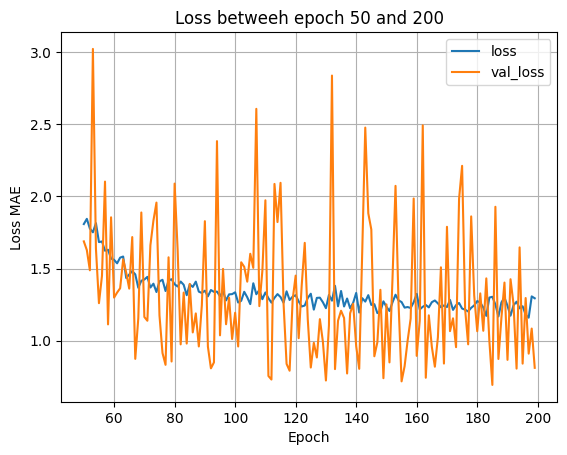

In [55]:
plot_loss(history,50,200)

In [56]:
model.evaluate(x_test,y_test)

68/68 [==============================] - 0s 626us/step - loss: 1.2427


1.2426892518997192

In [57]:
predict=model.predict(x_test)
predict.squeeze()

array([1012.42035,  952.27277, 1225.9867 , ..., 1750.7506 , 1735.808  ,
       1212.2062 ], dtype=float32)

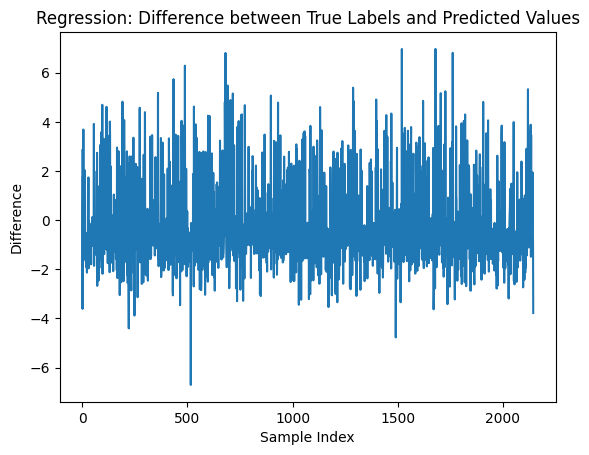

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have your true labels in a NumPy array called 'y_true'
# Assuming you have your predicted values in a NumPy array called 'y_pred'

# Calculate the difference between true labels and predicted values
diff = y_test - predict.squeeze()

# Plotting the difference
plt.plot(np.arange(len(diff)), diff)
plt.xlabel('Sample Index')
plt.ylabel('Difference')
plt.title('Regression: Difference between True Labels and Predicted Values')
plt.show()


In [59]:
diff.describe()

count    2146.000000
mean       -0.299959
std         1.576185
min        -6.702902
25%        -1.224867
50%        -0.617278
75%         0.075645
max         6.968843
Name: BMR, dtype: float64

In [60]:
sorted(diff) #jumlah kalori yang diprediksi berlebih

[-6.702902343750111,
 -4.768697265624951,
 -4.402153320312436,
 -3.8804853515625837,
 -3.778176757812389,
 -3.6270781250000255,
 -3.6077661132812864,
 -3.5350029296876073,
 -3.4579091796874764,
 -3.4411914062500273,
 -3.4166884765625127,
 -3.3404111328125055,
 -3.33796679687498,
 -3.29437304687508,
 -3.2814306640625546,
 -3.2384941406251073,
 -3.22503613281242,
 -3.210764648437589,
 -3.184717773437569,
 -3.1351240234375837,
 -3.086863281250089,
 -3.081577148437418,
 -3.0585917968749072,
 -3.0562314453125055,
 -3.046716796874989,
 -3.0364501953124545,
 -3.0201230468749145,
 -3.0133339843750946,
 -3.0017080078125673,
 -2.9883554687498872,
 -2.958059570312571,
 -2.8847382812500655,
 -2.873333007812562,
 -2.8684306640625437,
 -2.868372070312489,
 -2.864238281249982,
 -2.8580322265625,
 -2.846292968750049,
 -2.8324824218750564,
 -2.8281630859376037,
 -2.8116064453124636,
 -2.809213867187509,
 -2.7825029296875528,
 -2.7761552734375528,
 -2.7726367187499363,
 -2.7670732421875073,
 -2.73268652

In [41]:
sorted(diff, reverse=True) #jumlah kalori yang diprediksi kekurangan kalori

[4.640055664062402,
 4.269956054687555,
 3.9632587890625928,
 3.880883789062409,
 3.825048828125091,
 3.78494238281246,
 3.782430664062531,
 3.7396005859375236,
 3.6872871093748927,
 3.5929248046875273,
 3.53129589843752,
 3.5101748046874945,
 3.4531123046874654,
 3.3814267578125055,
 3.3384619140624636,
 3.2272001953124345,
 3.162631835937418,
 3.108272460937542,
 3.1024995117187473,
 3.0577412109375928,
 3.0282685546875427,
 2.9918525390623927,
 2.9887548828126,
 2.9362724609375164,
 2.9324277343749827,
 2.9290820312500045,
 2.9208535156250264,
 2.9048232421876037,
 2.889872070312549,
 2.881832031250042,
 2.874440429687411,
 2.872854492187571,
 2.8603867187499645,
 2.8573789062500055,
 2.8381025390624472,
 2.8379960937500073,
 2.8371723632812973,
 2.83499121093746,
 2.801457031250038,
 2.7990634765624236,
 2.798166992187589,
 2.772359374999951,
 2.7714755859375373,
 2.769710449218792,
 2.753483398437538,
 2.7462792968749454,
 2.736672851562389,
 2.7077919921875946,
 2.703302734375029

In [42]:
model.save('Model_7.h5')  